In [1]:
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [2]:
import random
import string
from collections import Counter

random.seed(0)

alphabet = list(string.ascii_lowercase)
reps = [9,2,2,4,12,2,3,2,9,1,1,4,2,6,8,2,1,6,4,6,4,2,2,1,2,1]

actions = []
for i,r in enumerate(reps):
    actions = actions + [alphabet[i]]*reps[i]
random.shuffle(actions)

In [3]:
bins = np.argsort(actions[:96])

In [4]:
gt = np.load('./data/cf_tcn_gt_list_96.npy',allow_pickle=True)
pred = np.load('./data/cf_tcn_obj_list_96.npy',allow_pickle=True)

In [5]:
X = np.zeros((96,96))
for j in range(len(gt)):
    for k in range(len(gt[j])):
        try:
            X[bins[gt[j][k]],bins[pred[j][k]]]=X[bins[gt[j][k]],bins[pred[j][k]]]+1
        except:
            continue

In [6]:
alph = dict(zip(list(string.ascii_lowercase),range(26)))

In [7]:
from collections import Counter
freqs = dict(Counter(actions))

In [8]:
alph_counts = dict(sorted(freqs.items(), key=lambda item: item[1]))

In [9]:
bins = [alph[a] for a in alph_counts.keys()]

In [10]:
a_suc = np.zeros(26)
a_fail = np.zeros(26)
for i in range(len(gt)):
    for j in range(len(gt[i])):
        idx = alph[actions[gt[i][j]]]
        if (actions[gt[i][j]]==actions[pred[i][j]]):
            a_suc[idx] = a_suc[idx]+1
        else:
            a_fail[idx] = a_fail[idx]+1

In [11]:
Nerrs = np.zeros(len(gt))
Nreps = np.zeros(len(gt))
for i in range(len(gt)):
    Nreps[i] = len(set([actions[j] for j in gt[i]]))#-len(gt[i]))/len(gt[i])
    for j in range(len(gt[i])):
        idx = alph[actions[gt[i][j]]]
        if (actions[gt[i][j]]!=actions[pred[i][j]]):
            Nerrs[i] = Nerrs[i] + 1

In [12]:
gt = np.load('./data/cf_gt_96.npy',allow_pickle=True)
gt = [np.argmax(g,1) for g in gt]
pred = np.load('./data/cf_obj_list_96.npy',allow_pickle=True)

In [13]:
a_suc_1 = np.zeros(26)
a_fail_1 = np.zeros(26)
for i in range(len(gt)):
    for j in range(len(gt[i])):
        idx = alph[actions[gt[i][j]]]
        if (actions[gt[i][j]]==actions[pred[i][j]]):
            a_suc_1[idx] = a_suc_1[idx]+1
        else:
            a_fail_1[idx] = a_fail_1[idx]+1

In [14]:
Nerrs_1 = np.zeros(len(gt))
Nreps_1 = np.zeros(len(gt))
for i in range(len(gt)):
    Nreps_1[i] = len(set([actions[j] for j in gt[i]]))#-len(gt[i]))/len(gt[i])
    for j in range(len(gt[i])):
        idx = alph[actions[gt[i][j]]]
        if (actions[gt[i][j]]!=actions[pred[i][j]]):
            Nerrs_1[i] = Nerrs_1[i] + 1

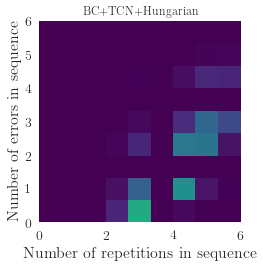

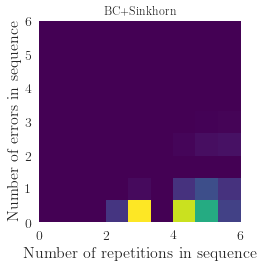

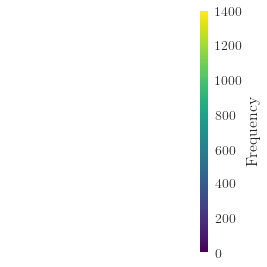

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig,ax = plt.subplots()#plt.subplots(1,2,figsize=(11.7,8.27))
plt.figure(figsize=(4,4))
_,_,_,im = plt.hist2d(Nreps,Nerrs,[np.linspace(0,6,10),np.linspace(0,6,10)],cmap='viridis',vmax=1400)
plt.ylabel('Number of errors in sequence')
plt.xlabel('Number of repetitions in sequence')
plt.title('BC+TCN+Hungarian')
# plt.colorbar(label='Frequency')
ax = plt.gca()
ax.set_aspect(1.0)
# divider = make_axes_locatable(ax)
# cax = divider.new_horizontal(size="5%", pad=0.5)#, pack_start=True)
# fig.add_axes(cax)
# fig.colorbar(im, cax=cax, orientation="vertical", label='Frequency')
plt.tight_layout()
plt.savefig('Error_analysis_tcn.pdf')
plt.show()

plt.figure(figsize=(4,4))
# fig,ax = plt.subplots()#plt.subplots(1,2,figsize=(11.7,8.27))
_,_,_,im = plt.hist2d(Nreps_1,Nerrs_1,[np.linspace(0,6,10),np.linspace(0,6,10)],cmap='viridis',vmax=1400)
plt.ylabel('Number of errors in sequence')
plt.xlabel('Number of repetitions in sequence')
plt.title('BC+Sinkhorn')
# plt.colorbar(label='Frequency')
ax = plt.gca()
ax.set_aspect(1.0)
# divider = make_axes_locatable(ax)
# cax = divider.new_horizontal(size="5%", pad=0.5)#, pack_start=True)
# fig.add_axes(cax)
# fig.colorbar(im, cax=cax, orientation="vertical", label='Frequency')
plt.tight_layout()
plt.savefig('Error_analysis_sink.pdf')
plt.show()


fig,ax = plt.subplots(figsize=(4,4))#plt.subplots(1,2,figsize=(11.7,8.27))
# _,_,_,im = plt.hist2d(Nreps_1,Nerrs_1,[np.linspace(0,6,10),np.linspace(0,6,10)],cmap='viridis',vmax=1400)
# plt.ylabel('Number of errors in sequence')
# plt.xlabel('Number of repetitions in sequence')
# plt.title('BC+Sinkhorn')
# # plt.colorbar(label='Frequency')
# ax = plt.gca()
# ax.set_aspect(1.0)
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.5)#, pack_start=True)
fig.add_axes(cax)
fig.colorbar(im, cax=cax, orientation="vertical", label='Frequency')
plt.tight_layout()
plt.savefig('Error_analysis_cb.pdf')
plt.show()

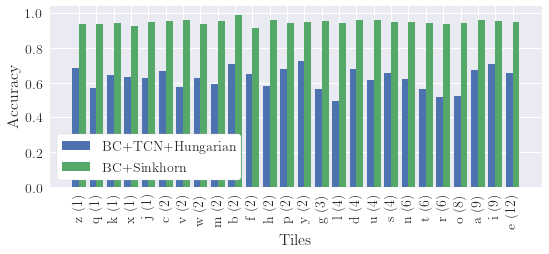

In [16]:
# plt.figure(figsize=(9,2.5))
plt.bar(np.arange(26)-0.2, a_suc/(a_suc+a_fail),width=0.4, label='BC+TCN+Hungarian')
plt.bar(np.arange(26)+0.2, a_suc_1/(a_suc_1+a_fail_1),width=0.4,label='BC+Sinkhorn')
plt.xticks(np.arange(26),[list(alph_counts.keys())[i]+' ('+str(list(alph_counts.values())[i])+')' for i in range(26)],rotation='90')
plt.ylabel('Accuracy')
plt.legend(loc='lower left',facecolor='white',framealpha=1,frameon=True)
plt.xlabel('Tiles')
ax = plt.gca()
ax.set_aspect(10)
plt.tight_layout()
plt.savefig('Success_letters.pdf')
plt.show()